In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 39s 1s/step - loss: 0.6970 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 43s 1s/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
31/31 [==============================] - 47s 2s/step - loss: 0.6932 - accuracy: 0.4792 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
31/31 [==============================] - 41s 1s/step - loss: 0.6930 - accuracy: 0.5344 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
31/31 [==============================] - 38s 1s/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
31/31 [==============================] - 38s 1s/step - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
31/31 [==============================] - 37s 1s/step - loss: 0.6933 - accuracy: 0.4965 - va

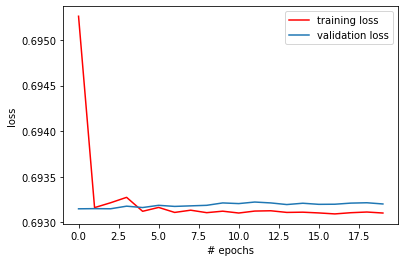

In [6]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

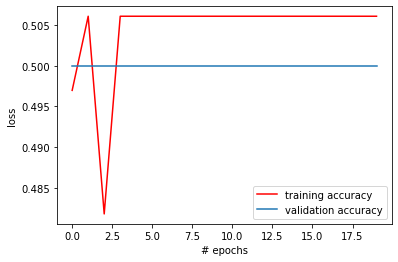

In [7]:

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()